In [2]:
## Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt

In [6]:
## Reading the dataset
df = pd.read_csv("Startups.csv")

In [7]:
## Perform EDA
df.shape    ### Gives number of rows and columns here 50 rows and 5 colmns

(50, 5)

In [8]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
df.drop(columns=['State'], inplace=True)

In [14]:
### Checking for null missing values nd replacing with 
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [15]:
### cheking datatypes of all columns
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
dtype: object

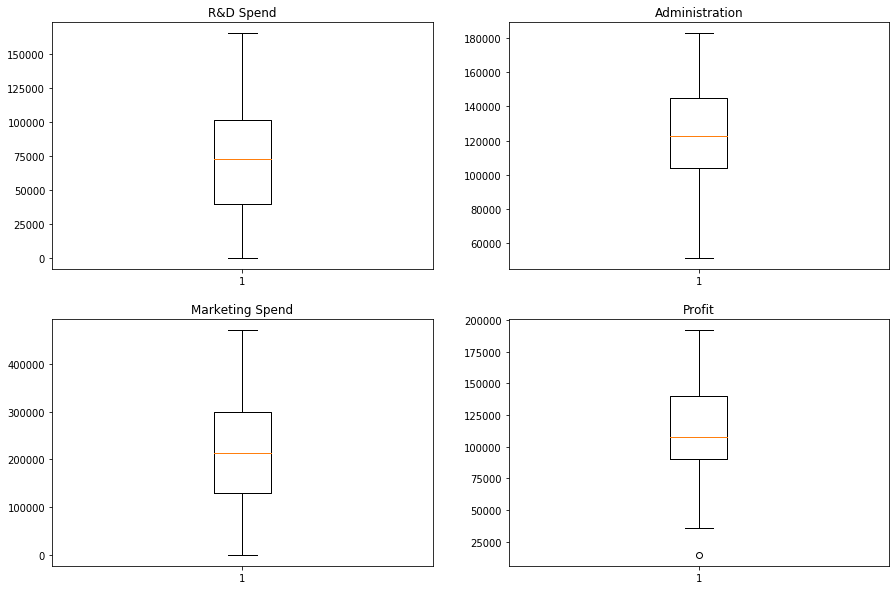

In [18]:
### Check for outliers
plt.figure(figsize = (15, 10))     ### Specifying width and height in figsize for each graph to be plotted
count = 1
for col in df:
    plt.subplot(2,2, count)     ## occupying how many graphs per row by column here 2 *2 given so 2 graphs per 2 row
    plt.boxplot(df[col])
    plt.title(col)
    count=count+1

In [19]:
## Checking Pairwise correlation of all columns 
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [21]:
## Diffrentiate X and y, x are input y is output,
## X will be multi array and Y will be 1 d Array

X = df.iloc[:,:-1].values    ## X will be all cols all rows, excluding last column
y = df.iloc[:,-1].values     ## y will be all rows but only last column

In [22]:
X.shape

(50, 3)

In [23]:
y.shape

(50,)

In [24]:
X

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [25]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [26]:
## Reshaping y 
y = y.reshape(-1,1)
y

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94],
       [156991.12],
       [156122.51],
       [155752.6 ],
       [152211.77],
       [149759.96],
       [146121.95],
       [144259.4 ],
       [141585.52],
       [134307.35],
       [132602.65],
       [129917.04],
       [126992.93],
       [125370.37],
       [124266.9 ],
       [122776.86],
       [118474.03],
       [111313.02],
       [110352.25],
       [108733.99],
       [108552.04],
       [107404.34],
       [105733.54],
       [105008.31],
       [103282.38],
       [101004.64],
       [ 99937.59],
       [ 97483.56],
       [ 97427.84],
       [ 96778.92],
       [ 96712.8 ],
       [ 96479.51],
       [ 90708.19],
       [ 89949.14],
       [ 81229.06],
       [ 81005.76],
       [ 78239.91],
       [ 77798.83],
       [ 71498.49],
       [ 69758.98],
       [ 65200.33],
       [ 64926.08],
       [ 49490.75],
       [ 42559.73],
       [ 35673.41],
       [ 14681.4 ]])

In [28]:
## Feature scaling
### It is required in terms of KNN
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [29]:
#splitting Dataset into into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [33]:
#importing the model and metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

C:\Users\Revnomix\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Revnomix\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X

In [34]:
## Selction of K value such that our mean square error is minimumm
mse = []   ## list to catch mean square error
r2 = []
for i in range(1,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse_i = mean_squared_error(y_test,y_pred)
    mse.append(mse_i)
    r2_i = r2_score(y_test,y_pred)
    r2.append(r2_i)
    print('i = {}, mse = {} , r2 = {}'.format(i,mse_i,r2_i))

i = 1, mse = 181267993.1742702 , r2 = 0.8582616429992957
i = 2, mse = 156629951.84759516 , r2 = 0.8775267953088985
i = 3, mse = 190831649.72201252 , r2 = 0.850783560728628
i = 4, mse = 160812891.9200177 , r2 = 0.8742560410907086
i = 5, mse = 255862773.3010785 , r2 = 0.7999339625806251
i = 6, mse = 344950780.6722844 , r2 = 0.7302736349511265
i = 7, mse = 358757424.2958516 , r2 = 0.7194778460827781
i = 8, mse = 299317828.95881253 , r2 = 0.7659552767440145
i = 9, mse = 322527092.885062 , r2 = 0.7478073242097817


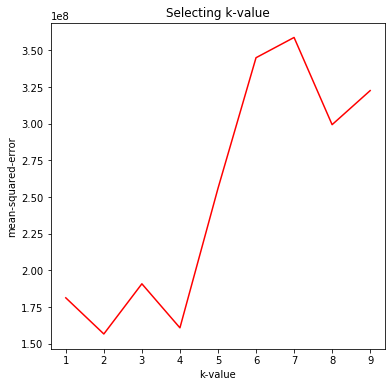

In [36]:
### Plotting a graph of MSE vs K value, and selcting K value where MSE is minimum
plt.figure(figsize = (6,6))
plt.plot(np.arange(1,10),mse,'r')
plt.xlabel('k-value')
plt.ylabel('mean-squared-error')
plt.title('Selecting k-value')
plt.show()

In [37]:
###Here MSE is lowest at K=2, so considering K as 2 for m=building model
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [38]:
r2_score(y_test,y_pred)

0.8775267953088985

In [ ]:
333